In [1]:

import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.common.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam, adadelta,Nadam
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\Admin\Anaconda3\envs\Vdetection\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\envs\Vdetection\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\envs\Vdetection\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\envs\Vd

In [2]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/vehicle_dataset'
data_dir_list = os.listdir(data_path)

img_rows=48
img_cols=48
num_channel=1


num_classes = 7  #need to check



labels_name  = {'Dragline':0, 'drill_machine':1, 'Dumper':2,'excavator':3, 'grader':4, 'jeep':5, 'loader':6} ### need to be changed

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48, 48))
        img_data_list.append(input_img_resize)
        labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=10)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

if num_channel==1:
    if K.common.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)


else:
    if K.image_dim_ordering()=='th':
        img_data= np.rollaxis(img_data, 3, 1)
        print(img_data.shape)
        

USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(32, 32)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(32,32))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled




# Defining the model
input_shape=img_data[0].shape
print("***************************")
print(input_shape)
print("***************************")

Loading the images of dataset-Dragline

Loading the images of dataset-drill_machine

Loading the images of dataset-Dumper

Loading the images of dataset-excavator

Loading the images of dataset-grader

Loading the images of dataset-jeep

Loading the images of dataset-loader

(3821, 48, 48)
(array([0, 1, 2, 3, 4, 5, 6]), array([501, 615, 616, 531, 503, 508, 547], dtype=int64))
(3821, 1, 48, 48)
***************************
(1, 48, 48)
***************************


In [3]:
num_epoch= 100
model = Sequential()
model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(1, 48, 48), data_format='channels_first'))   #preferred-128
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Convolution2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(58))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Dropout(0.5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["binary_accuracy"]) # adam is the best optimizer

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


# Training
X_train = X_train.reshape(X_train.shape[0], 1 ,48 ,48)
X_test = X_test.reshape(X_test.shape[0],1,48,48)

hist = model.fit(X_train, y_train, batch_size=300, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 46, 46)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 46, 46)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 23, 23)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 23, 23)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 21, 21)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 21, 21)        0         
____________________

2674/2674 [==============================] - 5s 2ms/step - loss: 1.1010 - binary_accuracy: 0.9027 - val_loss: 0.7338 - val_binary_accuracy: 0.9336
Epoch 25/100
2674/2674 [==============================] - 5s 2ms/step - loss: 1.1020 - binary_accuracy: 0.9024 - val_loss: 0.7158 - val_binary_accuracy: 0.9370
Epoch 26/100
2674/2674 [==============================] - 5s 2ms/step - loss: 1.0676 - binary_accuracy: 0.9053 - val_loss: 0.6962 - val_binary_accuracy: 0.9375
Epoch 27/100
2674/2674 [==============================] - 5s 2ms/step - loss: 1.0968 - binary_accuracy: 0.9005 - val_loss: 0.6453 - val_binary_accuracy: 0.9431
Epoch 28/100
2674/2674 [==============================] - 5s 2ms/step - loss: 1.0966 - binary_accuracy: 0.9026 - val_loss: 0.6667 - val_binary_accuracy: 0.9426
Epoch 29/100
2674/2674 [==============================] - 5s 2ms/step - loss: 1.0709 - binary_accuracy: 0.9037 - val_loss: 0.6669 - val_binary_accuracy: 0.9430
Epoch 30/100
2674/2674 [=============================

2674/2674 [==============================] - 5s 2ms/step - loss: 0.7939 - binary_accuracy: 0.9227 - val_loss: 0.3181 - val_binary_accuracy: 0.9721
Epoch 76/100
2674/2674 [==============================] - 5s 2ms/step - loss: 0.8055 - binary_accuracy: 0.9206 - val_loss: 0.3133 - val_binary_accuracy: 0.9731
Epoch 77/100
2674/2674 [==============================] - 5s 2ms/step - loss: 0.7774 - binary_accuracy: 0.9238 - val_loss: 0.3073 - val_binary_accuracy: 0.9725
Epoch 78/100
2674/2674 [==============================] - 5s 2ms/step - loss: 0.7571 - binary_accuracy: 0.9250 - val_loss: 0.3161 - val_binary_accuracy: 0.9731
Epoch 79/100
2674/2674 [==============================] - 5s 2ms/step - loss: 0.7401 - binary_accuracy: 0.9266 - val_loss: 0.3039 - val_binary_accuracy: 0.9724
Epoch 80/100
2674/2674 [==============================] - 5s 2ms/step - loss: 0.7570 - binary_accuracy: 0.9244 - val_loss: 0.3176 - val_binary_accuracy: 0.9716
Epoch 81/100
2674/2674 [=============================

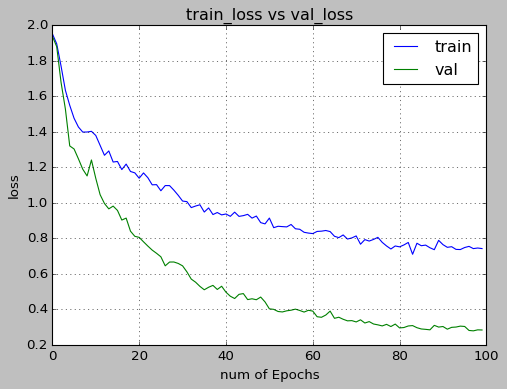

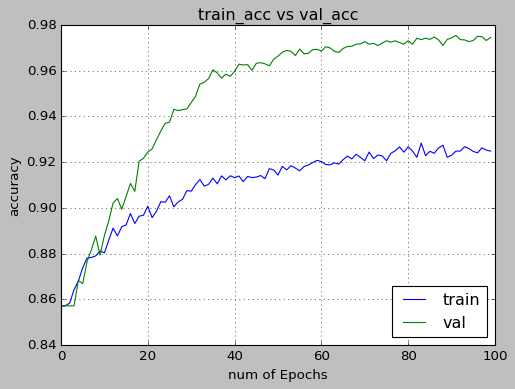

In [5]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['binary_accuracy']
val_acc=hist.history['val_binary_accuracy']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [6]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

#test_image = X_test[0:1]
#print (test_image.shape)

#print(model.predict(test_image))
#print(model.predict_classes(test_image))
#print(y_test[0:1])

# Testing a new image
test_image = cv2.imread('vehicle_dataset/excavator/excavator0.jpg')  # need to change
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(48,48))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print ("test shape :",test_image.shape)
   
if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		



lst =[0 ,1 ,2 ,3 ,4 ,5 ,6 , 7]
#'Dragline':0, 'drill_machine':1, 'Dumper':2,'excavator':3, 'grader':4, 'jeep':5, 'loader':6
labels_name  = {'Dragline':0,'drill_machine':1, 'Dumper':2, 'excavator':3,'grader':4, 'jeep':5, 'loader':6 }
name_list = list(labels_name.keys()) 
val_list = list(labels_name.values())

for pict in lst:
    if(model.predict_classes(test_image) == pict):
        print(model.predict_classes(test_image),"==========>",name_list[val_list.index(pict)])

Test Loss: 0.2844179022956539
Test accuracy: 0.9745921174026928
test shape : (48, 48)
(1, 1, 48, 48)
[3] ==========> excavator


In [7]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model
# load weights into new model
loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk


[[3.48553271e-03 9.19823069e-03 8.39464366e-02 ... 2.29710061e-03
  7.22558412e-04 1.00843767e-02]
 [3.55480425e-02 9.44864690e-01 6.37993496e-03 ... 1.70706437e-04
  3.24073061e-03 9.87040228e-04]
 [1.22561154e-03 9.97883022e-01 1.26949657e-04 ... 4.85581768e-05
  3.05959053e-04 3.21935222e-05]
 ...
 [1.64755657e-02 2.96090059e-02 3.38794738e-01 ... 1.09775150e-02
  9.91108790e-02 1.16689645e-01]
 [2.35994067e-03 9.74751592e-01 3.42875207e-03 ... 3.22305481e-03
  5.75825386e-03 8.55278922e-04]
 [4.07817774e-04 5.47989097e-04 1.17159419e-04 ... 1.94117508e-03
  9.85904157e-01 1.62661227e-03]]
[3 1 1 ... 3 1 5]
[3 1 1 ... 3 1 5]
                        precision    recall  f1-score   support

     class 0(Dragline)       0.89      0.95      0.92       150
class 1(drill_machine)       0.95      0.91      0.93       193
       class 2(Dumper)       0.90      0.91      0.90       175
    class 3(excavator)       0.93      0.82      0.87       163
       class 4(grader)       0.91      0.86

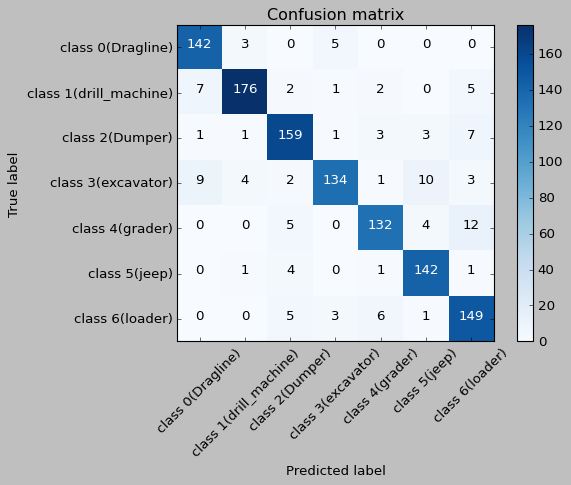

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
y_pred = model.predict_classes(X_test)
print(y_pred)
#target_names = ['class 0(bikes)','class 1(cars)', 'class 2(cats)', 'class 3(dogs)','class 4(flower)', 'class 5(horses)', 'class 6(humans)']        
target_names = ['class 0(Dragline)','class 1(drill_machine)', 'class 2(Dumper)', 'class 3(excavator)','class 4(grader)', 'class 5(jeep)', 'class 6(loader)'] 					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #plt.figure(1,figsize=(7,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

plt.show()
    

In [9]:
# import save model

import cv2
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.models import model_from_json
from keras import backend as k
k.common.set_image_dim_ordering('th')
import itertools
import pyttsx3


model = Sequential()

num_channel = 1


# Load json and create model 
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


loaded_model=load_model('model.hdf5')



test_image = cv2.imread('vehicle_dataset/Dragline/Dragline15.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image,(48,48))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		

'''
Y_pred = loaded_model.predict(test_image)
print("y_pred")
print(Y_pred)
print("")
y_pred = np.argmax(Y_pred, axis=1)
print("###########")
print(y_pred)
target_names = [class 0(Dragline)','class 1(drill_machine)', 'class 2(Dumper)', 'class 3(excavator)','class 4(grader)', 'class 5(jeep)', 'class 6(loader)]

'''

lst =[0 ,1 ,2 ,3 ,4 ,5 ,6, 7 ]

labels_name  = {'Dragline':0, 'drill_machine':1, 'Dumper':2,'excavator':3, 'grader':4, 'jeep':5, 'loader':6 }
name_list = list(labels_name.keys()) 
val_list = list(labels_name.values())

for pict in lst:
    if(loaded_model.predict_classes(test_image) == pict):
        print(loaded_model.predict_classes(test_image),"==========>",name_list[val_list.index(pict)])


Loaded model from disk
(48, 48)
(1, 1, 48, 48)
[0] ==========> Dragline


In [10]:
np.diag(cnf_matrix).sum()/cnf_matrix.sum().sum()

0.9014821272885789